<a href="https://colab.research.google.com/github/Goks1730/sdc_gokul/blob/main/COVID_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/deepanrajm/Covid-19.git

Cloning into 'Covid-19'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 78 (delta 4), reused 74 (delta 3), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [ ]:
!pip uninstall -y tensorflow keras

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0


In [ ]:
!pip install tensorflow==1.14 keras==2.1.2

     |████████████████████████████████| 109.3 MB 31 kB/s 
     |████████████████████████████████| 304 kB 45.8 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.1 MB 30.7 MB/s 
     |████████████████████████████████| 488 kB 45.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covidDetection',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3)

Found 225 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/3
200/200 [==============================] - 34s 166ms/step - loss: 0.7359 - accuracy: 0.6044


Predection -  Non covid


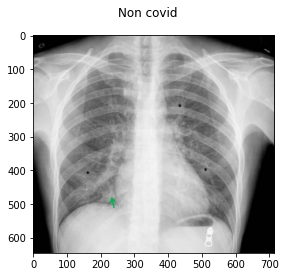

In [ ]:
img_src ='/content/drive/MyDrive/New Covid Set/Covid/000001-2.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/content/drive/MyDrive/New Covid Set/Covid/000001-2.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Non covid"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
print ("Predection - ",prediction) 

Predection -  Normal


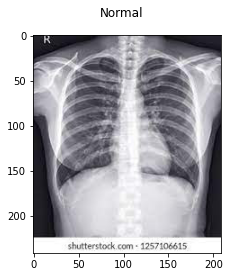

In [ ]:
img_src = '/content/drive/MyDrive/New Covid Set/Non Covid/normal.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/content/drive/MyDrive/New Covid Set/Non Covid/normal.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
print ("Predection - ",prediction) 